In [12]:
from tensorflow import keras
from tf_keras_vis.activation_maximization import ActivationMaximization
import matplotlib.pyplot as plt
import tensorflow as tf

In [13]:
model =  keras.models.load_model('/Users/luizeduardosantos/Documents/Turing/Interpretando-CNNs/model2-files/')

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)               

400/400 [==============================] - 17s 43ms/step - Score: 160.5053 - TotalVariation2D: 3.6661 - Norm: 46.8866


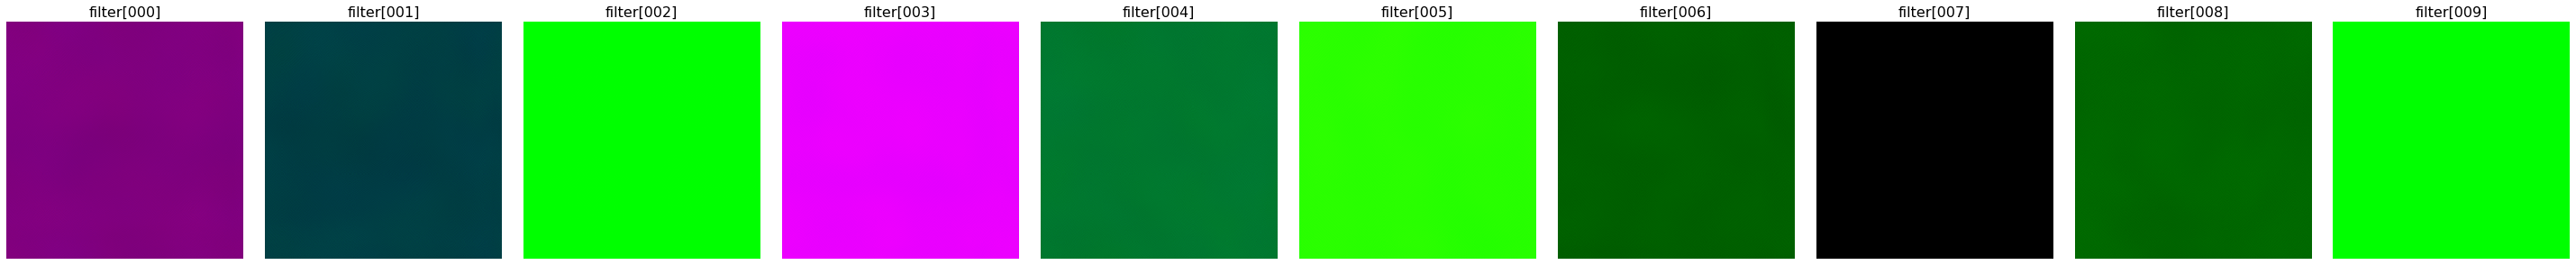

400/400 [==============================] - 36s 90ms/step - Score: 7.8476 - TotalVariation2D: 3.7236 - Norm: 18.9648


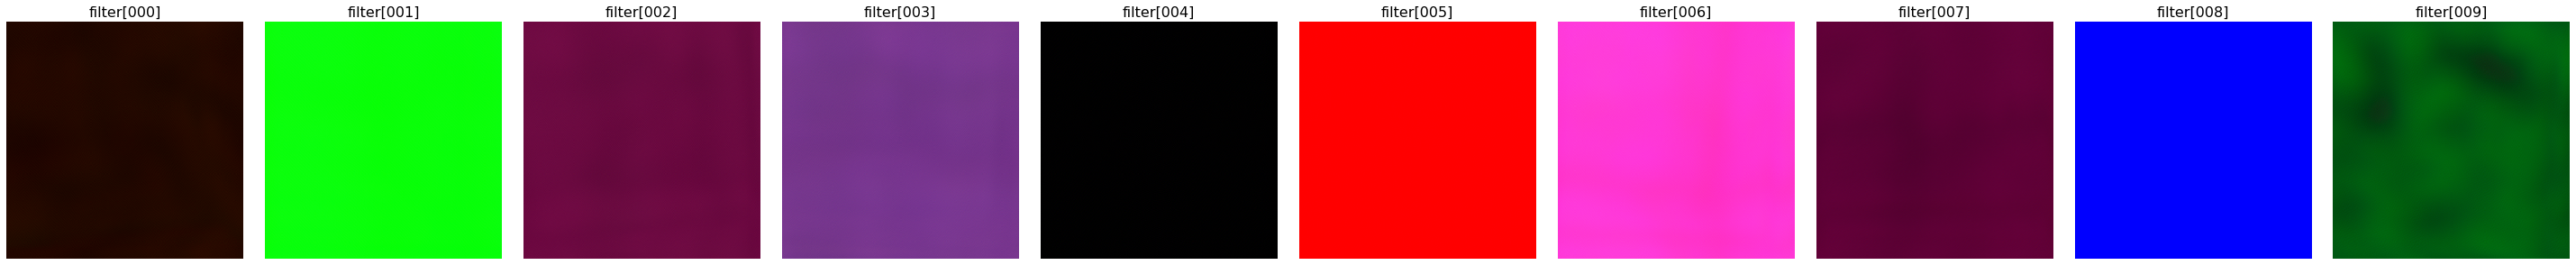

400/400 [==============================] - 44s 110ms/step - Score: 585.8931 - TotalVariation2D: 32.4491 - Norm: 34.0563


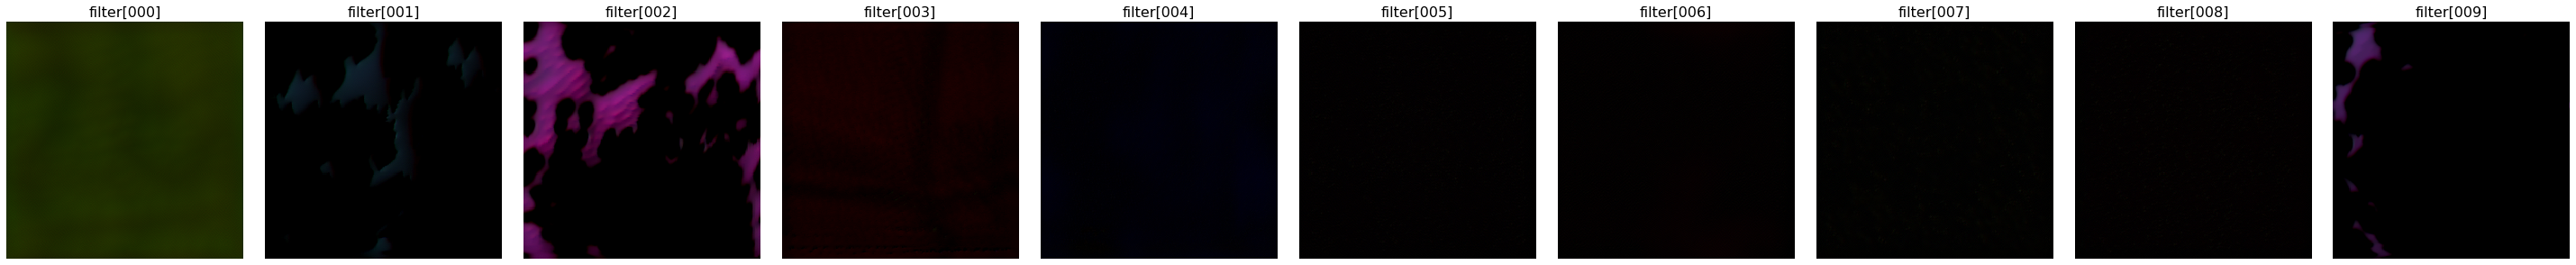

In [35]:
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress
layer_names = ["conv2d_9","conv2d_10","conv2d_11"] 

for layer_name in layer_names:
    # This instance constructs new model whose output is replaced to `conv2d_11` layer's output.
    extract_intermediate_layer = ExtractIntermediateLayer(index_or_name=layer_name)
    # This instance modify the model's last activation function to linear one.
    replace2linear = ReplaceToLinear()

    # Instead of using ExtractIntermediateLayer and ReplaceToLinear instance,
    # you can also define the function from scratch as follows:
    def model_modifier_function(current_model):
        target_layer = current_model.get_layer(name=layer_name)
        target_layer.activation = tf.keras.activations.linear
        new_model = tf.keras.Model(inputs=current_model.inputs,
                                outputs=target_layer.output)
        return new_model

    score = []
    for filter_number in range (10):
        score.append(CategoricalScore(filter_number))
    # Instead of using CategoricalScore object above,
    # o autor ensina ocmo definir uma funcao de erro personaliza

    activation_maximization = ActivationMaximization(model,
                                                    # Please note that `extract_intermediate_layer` has to come before `replace2linear`.
                                                    model_modifier=[extract_intermediate_layer, replace2linear],
                                                    clone=True)


    # Generate maximized activation
    activations = []
    for filter_number in range (10):
        activations.append(activation_maximization(score[filter_number], callbacks=[Progress()]))

    n_filtros = 10
    f, ax = plt.subplots(nrows=1, ncols= n_filtros, figsize=(4 * n_filtros, 4))
    for filter_number in range (n_filtros):
        ax[filter_number].set_title('filter[{:03d}]'.format(filter_number), fontsize=16)
        ax[filter_number].imshow(activations[filter_number][0])
        ax[filter_number].axis('off')
    plt.tight_layout()
    plt.show()